In [9]:
# Imports
import numpy
import glob
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [10]:
###- Begin Variables -###
path = "C:/Users/krell/OneDrive/Dokumenter/GitHub/P6ContentAwareEditing/KristianNN/trainmappe/nyportraitdorligbelysning/*.jpg"
pathTest= "C:/Users/krell/OneDrive/Dokumenter/GitHub/P6ContentAwareEditing/KristianNN/testmappe/portraitredigeret/*.jpg"
pathModel = "C:/Users/krell/OneDrive/Dokumenter/GitHub/P6ContentAwareEditing/KristianNN/trainedModelPortrait2"
files = glob.glob(path)
files2 = glob.glob(pathTest)
img_size = 224
y = []
x = []
test = []
image_array = []
output_data = numpy.loadtxt("porttraitpart2.csv")
testValues = numpy.loadtxt("C:/Users/krell/OneDrive/Dokumenter/GitHub/P6ContentAwareEditing/KristianNN/testmappe/testporttraitgammavals.txt")
diffHolderArray = []
###- End Variables -###

In [11]:
print("Preparing train data...")
# saves images from file folder to an array
for i in files:
    image = cv2.imread(i)
    rescaled_image = cv2.resize(image, (img_size,img_size), interpolation=cv2.INTER_AREA)
    norm_image = cv2.normalize(rescaled_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    image_array.append(norm_image)
# same as above but the test images
for i in files2:
    image2 = cv2.imread(i)
    rescaled_image2 = cv2.resize(image2, (img_size,img_size), interpolation=cv2.INTER_AREA)
    norm_image2 = cv2.normalize(rescaled_image2, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    test.append(norm_image2)

# Appends pictures into input array #useluss actually
for image in image_array:
    x.append(image)
# Saves the output data that is in csv file into an array
for val in output_data:
    y.append(val)



# This first of all makes the array a numpy array, and it then reshapes the data, so that it can be fed to the network.
# For both test and train data.
x = np.array(x).reshape(-1,img_size,img_size,3)
test = np.array(test).reshape(-1,img_size,img_size,3)
y = np.array(y)

Preparing train data...


In [12]:
# Setting up the sequential model, starting with a convulutional layer.
model = Sequential()

model.add(Conv2D(64, (3,3), kernel_initializer='normal', padding= 'same', input_shape = (224,224,3), activation='relu'))
model.add(Conv2D(64, (3,3),kernel_initializer='normal', padding='same', activation='relu'))
# stacks of convolutional layers with maxpooling at the end.
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(Conv2D(128, (3,3),kernel_initializer='normal',padding='same', activation='relu'))
model.add(Conv2D(128, (3,3),kernel_initializer='normal',padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(256, (3,3),kernel_initializer='normal',padding='same', activation='relu'))
model.add(Conv2D(256, (3,3),kernel_initializer='normal',padding='same', activation='relu'))
model.add(Conv2D(256, (3,3),kernel_initializer='normal',padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(512, (3,3),kernel_initializer='normal',padding='same', activation='relu'))
model.add(Conv2D(512, (3,3),kernel_initializer='normal',padding='same', activation='relu'))
model.add(Conv2D(512, (3,3),kernel_initializer='normal',padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(512, (3,3),kernel_initializer='normal',padding='same', activation='relu'))
model.add(Conv2D(512, (3,3),kernel_initializer='normal',padding='same', activation='relu'))
model.add(Conv2D(512, (3,3),kernel_initializer='normal',padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
# FLatten the output and send it to the three fully connected layers.
model.add(Flatten())
model.add(Dense(512, kernel_initializer='normal', activation='relu'))

model.add(Dense(64, kernel_initializer='normal', activation='relu'))

model.add(BatchNormalization())
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Define the loss and activation function
opt = keras.optimizers.Adam(learning_rate=3e-5)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])

In [ ]:
# Defining some parameters to save the model so that it can be loaded up without training it again.
checkPointPath = "C:/Users/krell/OneDrive/Dokumenter/GitHub/P6ContentAwareEditing/KristianNN/trainedModelPortrait5"
modelCheckPointCallback = keras.callbacks.ModelCheckpoint(
    filepath = checkPointPath,
    save_weights_only = False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
print("Training network...")
# Begin training.
model.fit(x,y, batch_size=64, epochs= 20, validation_split = 0.2,callbacks=[modelCheckPointCallback])

Training network...
Epoch 1/20
150/150 [==============================] - 2352s 16s/step - loss: 0.9858 - mean_absolute_error: 0.9858 - val_loss: 0.6148 - val_mean_absolute_error: 0.6148
Epoch 2/20
150/150 [==============================] - 2386s 16s/step - loss: 0.9666 - mean_absolute_error: 0.9666 - val_loss: 0.9257 - val_mean_absolute_error: 0.9257
Epoch 3/20
150/150 [==============================] - 2383s 16s/step - loss: 0.9443 - mean_absolute_error: 0.9443 - val_loss: 0.9089 - val_mean_absolute_error: 0.9089
Epoch 4/20
150/150 [==============================] - 2362s 16s/step - loss: 0.9170 - mean_absolute_error: 0.9170 - val_loss: 1.0088 - val_mean_absolute_error: 1.0088
Epoch 5/20
150/150 [==============================] - 2434s 16s/step - loss: 0.8843 - mean_absolute_error: 0.8843 - val_loss: 0.8808 - val_mean_absolute_error: 0.8808
Epoch 6/20
150/150 [==============================] - 2446s 16s/step - loss: 0.8460 - mean_absolute_error: 0.8460 - val_loss: 0.7769 - val_mean_a

In [7]:
model.summary()
# Use the trained network to make a prediction on some test images
prediction = model.predict(test)
print("Predicted gamma values for test images:")
print(prediction)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

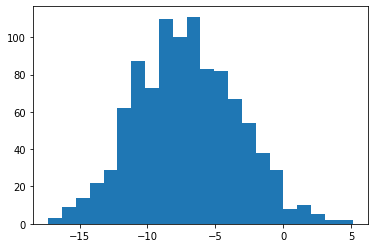

7.20001371717453


In [14]:
# Gamma function
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0,256)]).astype("uint8")
    return cv2.LUT(image,table)

# Evaluation function, which saves the difference in predictions from ground truth. and calculates the Mean Average Difference.
# Also plots the differences to a histogram.
def evaluate(prediction):
    sumOfDifference = 0
    diffNotRounded = []
    for i in range(len(prediction)):
        diff = testValues[i] - prediction[i]
        tempdiff = diff[0]
        diffRounded = round(diff[0],1)
        diffNotRounded.append(diff)
        diffHolderArray.append(diffRounded)
        sumOfDifference += abs(tempdiff)
    meanSumOfDifference = sumOfDifference / len(prediction)
    plt.hist(diffHolderArray, bins='auto')
    plt.show()

    return meanSumOfDifference, diffHolderArray
meanDifference, alldiffArray = evaluate(prediction)
print(meanDifference)



In [ ]:
# Applies the gamma predictions to the test pictures and saves them in another folder.
gamma_images = []
test2 = []
print("Applying gamma values and saving pictures...")
for i in files2:
    image3 = cv2.imread(i)
    #rescaled_image3 = cv2.resize(image3, (1000,1000), interpolation=cv2.INTER_AREA)
    test2.append(image3)

for i in range(0,len(test2)):
    gammaImage = adjust_gamma(test2[i], gamma=prediction[i])
    gamma_images.append(gammaImage)
    cv2.imwrite('C:/Users/krell/OneDrive/Dokumenter/GitHub/P6ContentAwareEditing/KristianNN/redigeret/' + str(i) + '.jpg', gamma_images[i])
print("Saved Pictures in folder: RedigeretAfNetvaerk")